### Dream Housing Finance
Automation of Loan eligibility process based on Customers input & it's validation over the Web Application and Model Building in this regard

- Model Building and saving the model using Pickle

In [106]:
# 1. Import required libraries

#===========Importing Classifier=========
from sklearn.ensemble import RandomForestClassifier

#==========Importing numpy for multidimensional array
import numpy as np

#=========importing matplotlib for Plotting Graph==========
import matplotlib.pyplot as plt

#=========Loadig model selection for splitting the dataset==============
from sklearn.model_selection import train_test_split

#=========Importing models for classification efficiency
from sklearn.metrics import accuracy_score, classification_report

#========Importing library for dealing with DataFrame=====
import pandas as pd

In [107]:
# 1b. Loading and reading the dataset
loan = pd.read_csv('loan_approval_data.csv')

In [108]:
# 2. Familiarizing with features of the dataset
loan.head(5) # Display the first 5 rows of the dataset

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [109]:
# 2a. 
print('No. of Rows:',len(loan)) # checking the number of rows in the dataset
print('Shape:',loan.shape) # checking the shape of the dataset ie. no. of rows and columns
print('Info:')
loan.info() # checking the information of the dataset ie. data types, missing values etc.

No. of Rows: 614
Shape: (614, 13)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [110]:
"""
Need to check if the dataset contain null values or not. If yes then we have to fill the null values with the mean of the column or any other method for better classification accuracy

and 

Also to Encode string with Numerical values such as Gender and Education and loan status etc. to achieve better classification model
"""

'\nNeed to check if the dataset contain null values or not. If yes then we have to fill the null values with the mean of the column or any other method for better classification accuracy\n\nand \n\nAlso to Encode string with Numerical values such as Gender and Education and loan status etc. to achieve better classification model\n'

In [111]:
#3. =======Checking the presence of Null Values=========

#==== By use of built in Function isnull() and sum()

loan.isnull().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [112]:
loan.head(5)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [113]:
# 3a. Filling the missing values using SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# Define the imputers
mean_imputer = SimpleImputer(strategy='mean') # for numeric columns
freq_imputer = SimpleImputer(strategy='most_frequent') # for object columns

# Select the numeric columns
numeric_columns = loan.select_dtypes(include=[np.number]).columns

# Select the object columns
object_columns = loan.select_dtypes(include=['object']).columns

# Fit and transform the numeric columns
numeric_data = pd.DataFrame(mean_imputer.fit_transform(loan[numeric_columns]), columns=numeric_columns)

# Fit and transform the object columns
object_data = pd.DataFrame(freq_imputer.fit_transform(loan[object_columns]), columns=object_columns)

# Concatenate the numeric and object columns
loan = pd.concat([numeric_data, object_data], axis=1)

In [114]:
loan.isnull().sum()

dependents           0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
loan_id              0
gender               0
married              0
education            0
self_employed        0
property_area        0
loan_status          0
dtype: int64

In [115]:
loan.columns

Index(['dependents', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'loan_id', 'gender', 'married',
       'education', 'self_employed', 'property_area', 'loan_status'],
      dtype='object')

In [116]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dependents         614 non-null    float64
 1   applicantincome    614 non-null    float64
 2   coapplicantincome  614 non-null    float64
 3   loanamount         614 non-null    float64
 4   loan_amount_term   614 non-null    float64
 5   credit_history     614 non-null    float64
 6   loan_id            614 non-null    object 
 7   gender             614 non-null    object 
 8   married            614 non-null    object 
 9   education          614 non-null    object 
 10  self_employed      614 non-null    object 
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(6), object(7)
memory usage: 62.5+ KB


In [117]:
loan.head(5)

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,loan_id,gender,married,education,self_employed,property_area,loan_status
0,0.0,5849.0,0.0,146.412162,360.0,1.0,lp001002,male,no,graduate,no,urban,y
1,1.0,4583.0,1508.0,128.000000,360.0,1.0,lp001003,male,yes,graduate,no,rural,n
2,0.0,3000.0,0.0,66.000000,360.0,1.0,lp001005,male,yes,graduate,yes,urban,y
3,0.0,2583.0,2358.0,120.000000,360.0,1.0,lp001006,male,yes,not graduate,no,urban,y
4,0.0,6000.0,0.0,141.000000,360.0,1.0,lp001008,male,no,graduate,no,urban,y


In [118]:
# 3b. Drop the columns which are not required for classification model ie. redundant columns 

loan = loan.drop(['loan_id'], axis=1) # axis=1 for column and axis=0 for row

In [119]:
loan.columns

Index(['dependents', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'gender', 'married', 'education',
       'self_employed', 'property_area', 'loan_status'],
      dtype='object')

In [120]:
loan.shape

(614, 12)

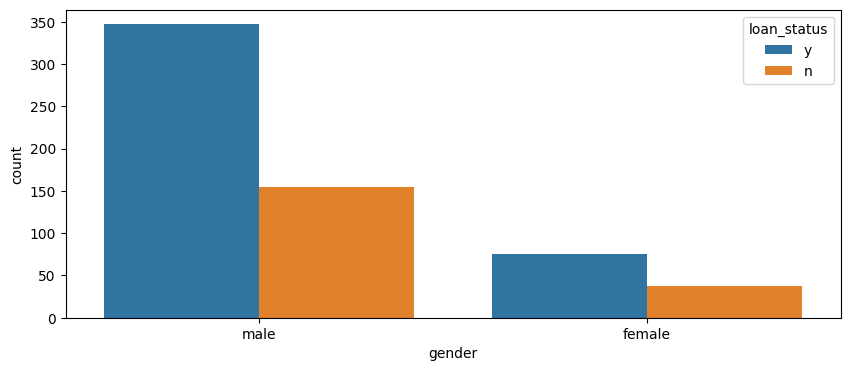

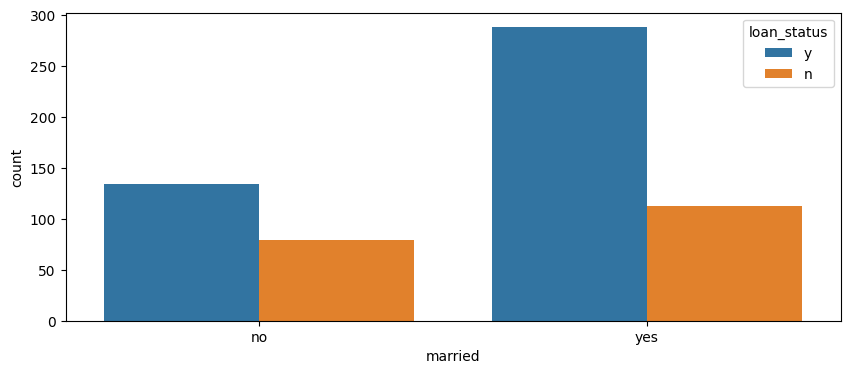

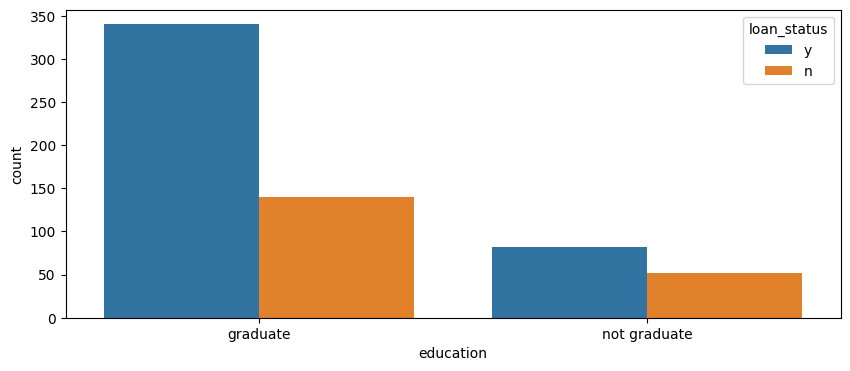

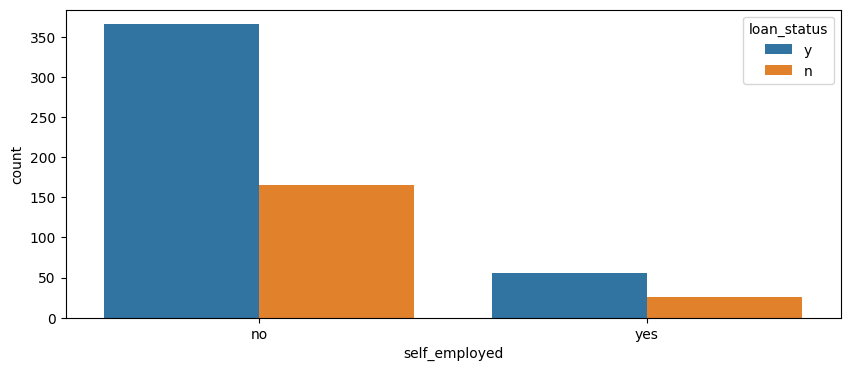

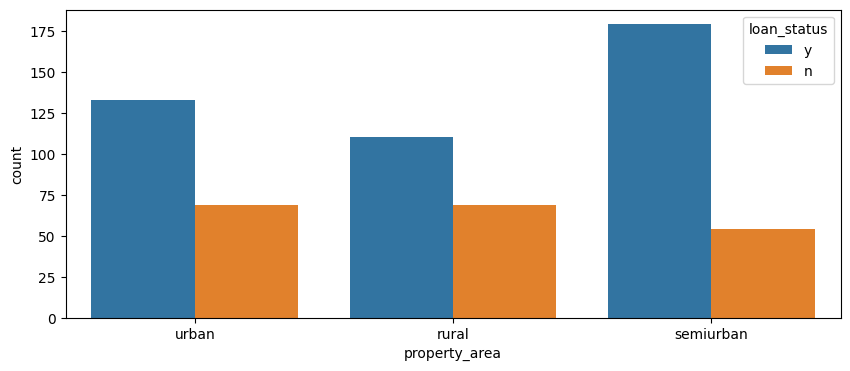

In [121]:
# 4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features using countplot

import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['gender', 'married', 'education', 'self_employed', 'property_area']

for feature in categorical_features:
    plt.figure(figsize=(10,4))
    sns.countplot(x=feature, hue='loan_status', data=loan)
    plt.show()

In [122]:
import pandas as pd

for feature in categorical_features:
    print(pd.crosstab(loan[feature], loan['loan_status']))

loan_status    n    y
gender               
female        37   75
male         155  347
loan_status    n    y
married              
no            79  134
yes          113  288
loan_status     n    y
education             
graduate      140  340
not graduate   52   82
loan_status      n    y
self_employed          
no             166  366
yes             26   56
loan_status     n    y
property_area         
rural          69  110
semiurban      54  179
urban          69  133


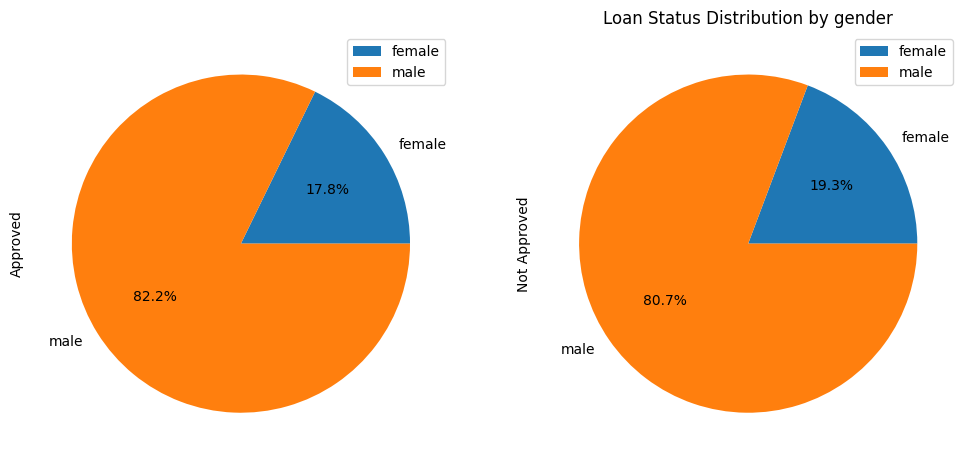

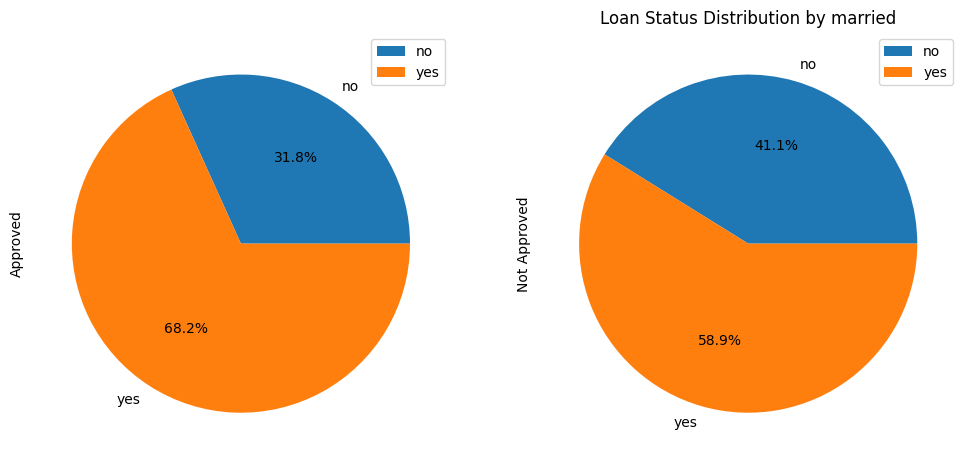

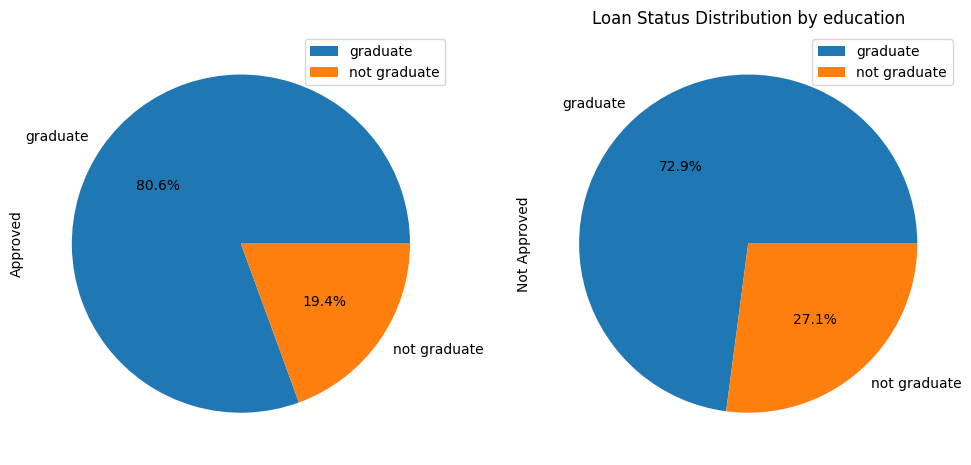

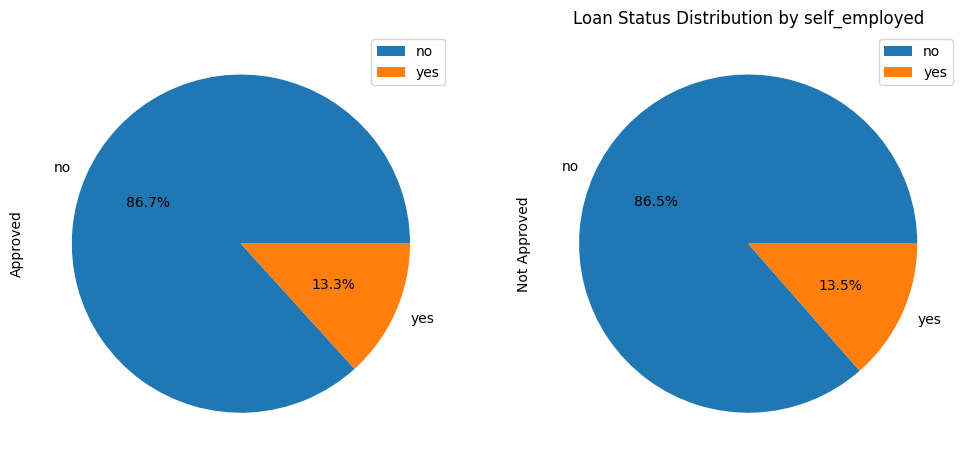

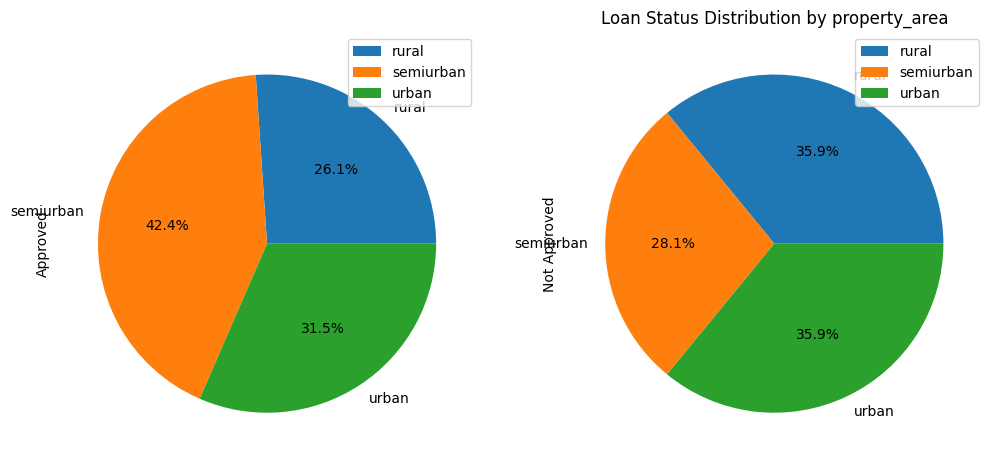

In [123]:
import matplotlib.pyplot as plt

# Replace 'n' and 'y' with 'Not Approved' and 'Approved'
loan['loan_status'] = loan['loan_status'].replace({'n': 'Not Approved', 'y': 'Approved'})

categorical_features = ['gender', 'married', 'education', 'self_employed', 'property_area']

for feature in categorical_features:
    loan_status_distribution = pd.crosstab(loan[feature], loan['loan_status'])
    loan_status_distribution.plot(kind='pie', subplots=True, figsize=(12, 6), autopct='%1.1f%%')
    plt.title(f'Loan Status Distribution by {feature}')
    plt.show()

4b. Here are some crosstab observations drawn:

1. Gender: There are more males than females in the dataset. Also, the proportion of loans approved is higher for males than for females.

2. Married: People who are married have a higher count of loan approval than those who are not married.

3. Education: Graduates have a higher count of loan approval than non-graduates.

4. Self_Employed: Non-self-employed individuals have a higher count of loan approval than self-employed individuals.

5. Property_Area: People living in semi-urban areas have the highest count of loan approval, followed by those in urban and rural areas.



In [124]:
loan.head(3)

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,gender,married,education,self_employed,property_area,loan_status
0,0.0,5849.0,0.0,146.412162,360.0,1.0,male,no,graduate,no,urban,Approved
1,1.0,4583.0,1508.0,128.000000,360.0,1.0,male,yes,graduate,no,rural,Not Approved
2,0.0,3000.0,0.0,66.000000,360.0,1.0,male,yes,graduate,yes,urban,Approved


In [125]:
# 5. Encode the categorical data to numerical data using LabelEncoder

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Select columns of type 'object'
object_cols = loan.select_dtypes(include=['object']).columns

# Apply the LabelEncoder to each of the object columns
for col in object_cols:
    loan[col] = le.fit_transform(loan[col])




In [126]:
loan.head(3)

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,gender,married,education,self_employed,property_area,loan_status
0,0.0,5849.0,0.0,146.412162,360.0,1.0,1,0,0,0,2,0
1,1.0,4583.0,1508.0,128.000000,360.0,1.0,1,1,0,0,0,1
2,0.0,3000.0,0.0,66.000000,360.0,1.0,1,1,0,1,2,0


In [127]:
# Creating a new csv file for processed data
loan.to_csv("Loan Processed data.csv") # Saving the processed data to a new csv file

In [128]:
# 6. Split the dataset into features and target variable 
data = loan.iloc[:, 0:-1] # Selecting all the columns except the last column
target = loan.iloc[:, -1:] # Selecting the last column

In [129]:
loan.columns

Index(['dependents', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'gender', 'married', 'education',
       'self_employed', 'property_area', 'loan_status'],
      dtype='object')

In [130]:
data.head(5)

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,gender,married,education,self_employed,property_area
0,0.0,5849.0,0.0,146.412162,360.0,1.0,1,0,0,0,2
1,1.0,4583.0,1508.0,128.000000,360.0,1.0,1,1,0,0,0
2,0.0,3000.0,0.0,66.000000,360.0,1.0,1,1,0,1,2
3,0.0,2583.0,2358.0,120.000000,360.0,1.0,1,1,1,0,2
4,0.0,6000.0,0.0,141.000000,360.0,1.0,1,0,0,0,2


In [131]:
target.head(2)

,loan_status
0,0
1,1


In [132]:
data.to_csv("Data.csv")
target.to_csv("Target.csv")

In [133]:
# 6. Split the dataset into training and testing set using train_test_split function

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 1/5, random_state=10) # Splitting the dataset into training and testing set with 1/5 ratio ie. 20% for testing and 80% for training the model. random_state is used to get the same result every time we run the code. data, target are the features and target variable respectively.

7. Build any classification model to predict the loan status of the customer
and save your model using pickle.

In [134]:
# 7a. Train the model using RandomForestClassifier, KNeighborsClassifier, MultinomialNB, GaussianNB, LogisticRegression, DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Get the feature names from 'data'
features = data.columns.tolist()

# Set the column names of 'x_train' and 'x_test'
x_train.columns = features
x_test.columns = features

# Define a dictionary with the models
models = {
    "Random Forest Classifier": RandomForestClassifier(),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "Multinomial NB": MultinomialNB(),
    "Gaussian NB": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

# Train the models and calculate the accuracy scores
for model_name, model in models.items():
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    print(f"The accuracy of {model_name} is {accuracy}\n")

c:\Users\nhari\anaconda3\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The accuracy of Random Forest Classifier is 0.7804878048780488

The accuracy of K Nearest Neighbors is 0.6097560975609756

The accuracy of Multinomial NB is 0.5365853658536586

The accuracy of Gaussian NB is 0.7804878048780488

The accuracy of Logistic Regression is 0.7967479674796748

The accuracy of Decision Tree Classifier is 0.7073170731707317



c:\Users\nhari\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\nhari\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nhari\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nhari\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

In [135]:
from sklearn.metrics import classification_report

# Apply other metrics like classification report which gives precision, recall, f1-score and support for each class in the target variable to check the efficiency of the model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print(f"Metrics for {model_name}:\n")
    print(classification_report(y_test, pred))

c:\Users\nhari\anaconda3\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Metrics for Random Forest Classifier:

              precision    recall  f1-score   support

           0       0.78      0.95      0.86        87
           1       0.76      0.36      0.49        36

    accuracy                           0.78       123
   macro avg       0.77      0.66      0.68       123
weighted avg       0.78      0.78      0.75       123

Metrics for K Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.69      0.80      0.74        87
           1       0.23      0.14      0.17        36

    accuracy                           0.61       123
   macro avg       0.46      0.47      0.46       123
weighted avg       0.56      0.61      0.58       123

Metrics for Multinomial NB:

              precision    recall  f1-score   support

           0       0.75      0.52      0.61        87
           1       0.33      0.58      0.42        36

    accuracy                           0.54       123
   macro avg       0.54   

c:\Users\nhari\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\nhari\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nhari\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nhari\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

In [136]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Reshape y_train to a 1D array
y_train = y_train.squeeze()

# Increase the number of iterations for Logistic Regression
models["Logistic Regression"] = LogisticRegression(max_iter=1000)

# Apply other metrics like classification report which gives precision, recall, f1-score and support for each class in the target variable to check the efficiency of the model
with open('output.txt', 'w') as f:
    for model_name, model in models.items():
        model.fit(x_train_scaled, y_train)
        pred = model.predict(x_test_scaled)
        f.write(f"Metrics for {model_name}:\n")
        f.write(classification_report(y_test, pred, zero_division=1))

### output.txt:
Metrics for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        87
           1       0.74      0.39      0.51        36

    accuracy                           0.78       123
   macro avg       0.76      0.67      0.68       123
weighted avg       0.77      0.78      0.76       123
Metrics for K Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.78      0.92      0.85        87
           1       0.67      0.39      0.49        36

    accuracy                           0.76       123
   macro avg       0.73      0.65      0.67       123
weighted avg       0.75      0.76      0.74       123
Metrics for Multinomial NB:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        87
           1       1.00      0.00      0.00        36

    accuracy                           0.71       123
   macro avg       0.85      0.50      0.41       123
weighted avg       0.79      0.71      0.59       123
Metrics for Gaussian NB:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        87
           1       0.80      0.33      0.47        36

    accuracy                           0.78       123
   macro avg       0.79      0.65      0.67       123
weighted avg       0.78      0.78      0.75       123
Metrics for Logistic Regression:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87        87
           1       0.92      0.33      0.49        36

    accuracy                           0.80       123
   macro avg       0.85      0.66      0.68       123
weighted avg       0.82      0.80      0.76       123
Metrics for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        87
           1       0.53      0.53      0.53        36

    accuracy                           0.72       123
   macro avg       0.67      0.67      0.67       123
weighted avg       0.72      0.72      0.72       123


In [137]:
# 7b. Based on the derived metrics find Random Forest Classifier model a better choice accordingly proceeding with pickling this as the final model

import pickle

# Assuming 'random_forest_model' is your trained Random Forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(models['Random Forest Classifier'], file)

In [138]:
import pickle
from sklearn.metrics import accuracy_score

# Load the model from the pickle file
with open('random_forest_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Assuming x_test_scaled and y_test are your test data and labels
predictions = model.predict(x_test_scaled)

# Print the accuracy of the model on the test data
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.7886178861788617


In [139]:
import pickle

# Assuming 'logistic_regression_model' is your trained Logistic Regression model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump('Logistic Regression', file)

In [140]:
import pickle

with open('logistic_regression_model.pkl', 'rb') as file:
    model = pickle.load(file)

print(model)

Logistic Regression


In [141]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pickle

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Train your Logistic Regression model with increased max_iter
logistic_regression_model = LogisticRegression(max_iter=1000).fit(x_train_scaled, y_train)

# Save the trained model to a pickle file
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(logistic_regression_model, file)

In [142]:
import pickle

# Load the model from the pickle file
with open('logistic_regression_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Assuming x_test is a pandas DataFrame
x_test_values = x_test.values

# Use the model to make predictions
predictions = model.predict(x_test_values)
print(predictions)
print('y_test',y_test)
print("model",model)
print("Accuracy:", accuracy_score(y_test, predictions))

[1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1
 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0
 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0
 0 1 0 1 1 1 1 1 1 1 0 0]
y_test      loan_status
285            0
323            0
482            0
173            0
518            1
..           ...
554            1
6              0
242            0
192            1
157            0

[123 rows x 1 columns]
model LogisticRegression(max_iter=1000)
Accuracy: 0.4959349593495935


In [143]:
import pickle
from sklearn.metrics import accuracy_score

# Load the model from the pickle file
with open('random_forest_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Assuming x_test_scaled and y_test are your test data and labels
predictions = model.predict(x_test_scaled)

# Print the accuracy of the model on the test data
print("Accuracy:", accuracy_score(y_test, predictions)) # Accuracy of the model on the test data
print("model",model) # 
print("predictions",predictions) # Predicted values of the model on the test data ie. x_test
print("y_test",y_test)

Accuracy: 0.7886178861788617
model RandomForestClassifier()
predictions [0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0]
y_test      loan_status
285            0
323            0
482            0
173            0
518            1
..           ...
554            1
6              0
242            0
192            1
157            0

[123 rows x 1 columns]


Will be proceeding further with random_forest_model.pkl

In [144]:
print(data.info())
print(target.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dependents         614 non-null    float64
 1   applicantincome    614 non-null    float64
 2   coapplicantincome  614 non-null    float64
 3   loanamount         614 non-null    float64
 4   loan_amount_term   614 non-null    float64
 5   credit_history     614 non-null    float64
 6   gender             614 non-null    int32  
 7   married            614 non-null    int32  
 8   education          614 non-null    int32  
 9   self_employed      614 non-null    int32  
 10  property_area      614 non-null    int32  
dtypes: float64(6), int32(5)
memory usage: 40.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   loan_status  614 non-null 

In [149]:
# Test prediction using the trained model
# Load the model from the pickle file
with open('random_forest_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Define the inputs and the values to be in standardized format
inputs = np.array([[1, 1, 1, 0, 0, 22, 12, 44, 22, 1, 0]])  # The order of inputs should match the order of features the model was trained on ie. gender, married, dependents, education, self_employed, applicant_income, coapplicant_income, loan_amount, loan_amount_term, credit_history, property_area

# Use the model to make a prediction
prediction = model.predict(inputs)

print("Prediction:", prediction)

Prediction: [0]


In [150]:
# Test prediction using the trained model
# Load the model from the pickle file
with open('random_forest_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Define the inputs and the values to be in standardized format
inputs = np.array([[0, 1, 1, 0, 0, 22, 12, 44, 22, 1, 0]])  # The order of inputs should match the order of features the model was trained on ie. gender, married, dependents, education, self_employed, applicant_income, coapplicant_income, loan_amount, loan_amount_term, credit_history, property_area

# Use the model to make a prediction
prediction = model.predict(inputs)

print("Prediction:", prediction)

Prediction: [1]


In [151]:
# Define the inputs in the same format as in the Flask application
inputs = {
    "gender": 1,  # "Male"
    "married": 1,  # "Yes"
    "dependents": 1,
    "education": 0,  # "Graduate"
    "self_employed": 0,  # "No"
    "applicant_income": 22,
    "coapplicant_income": 12,
    "loan_amount": 44,
    "loan_amount_term": 22,
    "credit_history": 1,
    "property_area": 0,  # "Rural"
}

# Convert the inputs to a pandas DataFrame
df = pd.DataFrame(inputs, index=[0])

# Use the model to make a prediction
prediction = model.predict(df)

print("Prediction:", prediction)

Prediction: [0]


c:\Users\nhari\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Next app.py